In [23]:
# !pip install requests

# !pip install beautifulsoup4 lxml

In [24]:
# Loading required libraries
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re

In [25]:
product_price = []
product_brand = []
product_model = []
product_color = []
product_rating = []
product_rom = []
product_ram = []
product_display = []
product_battery = []
product_camera = []
product_processor = []
product_voicecall = []

In [26]:
for page in range(1, 25):  
    url = f"https://www.flipkart.com/search?q=mobiles&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off8&page={page}"
    request_header = {
        'Content-Type': 'image/webp; charset=UTF-8', 
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:126.0) Gecko/20100101 Firefox/126.0',
        'Accept-Encoding': 'gzip, deflate, br, zstd'
    }

    response = requests.get(url)
    html_text = response.text
    soup = BeautifulSoup(html_text, "html.parser")

    # Price
    price = soup.find_all("div", class_="Nx9bqj _4b5DiR")
    for i in price:
        product_price.append(re.sub(r"\D", "", i.text))

    # Product brand & model name block
    data = soup.find_all("div", class_="KzDlHZ")

    # brands
    for i in data:
        product_brand.append(i.text.split()[0])

    # models
    for i in data:
        product_model.append(i.text.split("(")[0])

    # colors
    for i in data:
        if "(" in i.text:
            product_color.append(i.text.split("(")[1].split(",")[0])
        else:
            product_color.append(np.nan)

    # rating
    rating = soup.find_all('div', class_="XQDdHH")
    for i in rating:
        product_rating.append(i.text)

    # specification features
    features = soup.find_all("li", class_="J+igdf")

    # RAM
    for i in features:
        a = re.findall(r"(\d+)\s\w+\sRAM", i.text)
        if len(a) > 0:
            product_ram.append(a[0])
        else:
            product_ram.append(None)
            

    # ROM
    for i in features:
        a = re.findall(r"(\d+)\s\w+\sROM", i.text)
        if len(a) > 0:
            product_rom.append(a[0])
        else:
            product_rom.append(None)
        

    # display
    for i in features:
        a = re.findall(r"(\d+\.\d+)\sinch", i.text)
        if len(a) > 0:
            product_display.append(a[0])
        else:
            product_display.append(None)

    # battery
    for i in features:
        a = re.findall(r"(\d+)\smAh", i.text)
        if len(a) > 0:
            product_battery.append(a[0])
        else:
            product_battery.append(None)

    # Camera (after MP)
    for i in features:
        match = re.findall(r"MP\s*(\d+\.?\d*)", i.text)
        if match:
            product_camera.append(match)
        else:
            product_camera.append(None)

    # Processor
    for i in features:
        match = re.findall(r"Processor[:\-]?\s*(.*)", i.text)
        if match:
            product_processor.append(match[0])
        else:
            product_processor.append(None)

    # Voice Call (Single/Dual SIM)
    for i in features:
        match = re.findall(r"(Single|Dual)\s*Sim", i.text, re.IGNORECASE)
        if match:
            product_voicecall.append(match[0].capitalize() + " SIM")
        else:
            product_voicecall.append(None)


In [27]:
print("product_price :", len(product_price))
print("product_brand :", len(product_brand))
print("product_model :", len(product_model))
print("product_color :", len(product_color))
print("product_rating :", len(product_rating))
print("product_rom :", len(product_rom))
print("product_ram :", len(product_ram))
print("product_display :", len(product_display))
print("product_battery :", len(product_battery))
print("proudct_camera :", len(product_camera))
print("product_processor :", len(product_processor))
print("product_voicecall :", len(product_voicecall))


product_price : 576
product_brand : 576
product_model : 576
product_color : 576
product_rating : 935
product_rom : 3318
product_ram : 3318
product_display : 3318
product_battery : 3318
proudct_camera : 3318
product_processor : 3318
product_voicecall : 3318


In [28]:
correct_length = len(product_price)

product_rating = product_rating[:correct_length]
product_rom = product_rom[:correct_length]
product_ram = product_ram[:correct_length]
product_display = product_display[:correct_length]
product_battery = product_battery[:correct_length]
product_camera = product_camera[:correct_length]
product_processor = product_processor[:correct_length]
product_voicecall = product_voicecall[:correct_length]


In [29]:
print("product_price :", len(product_price))
print("product_brand :", len(product_brand))
print("product_model :", len(product_model))
print("product_color :", len(product_color))
print("product_rating :", len(product_rating))
print("product_rom :", len(product_rom))
print("product_ram :", len(product_ram))
print("product_display :", len(product_display))
print("product_battery :", len(product_battery))
print("proudct_camera :", len(product_camera))
print("product_processor :", len(product_processor))
print("product_voicecall :", len(product_voicecall))

product_price : 576
product_brand : 576
product_model : 576
product_color : 576
product_rating : 576
product_rom : 576
product_ram : 576
product_display : 576
product_battery : 576
proudct_camera : 576
product_processor : 576
product_voicecall : 576


In [30]:
products = {
    "Price": product_price,
    "Brand": product_brand,
    "Model": product_model,
    "Color": product_color,
    "Rating": product_rating,
    "ROM": product_rom,
    "RAM": product_ram,
    "Display (inch)": product_display,
    "Battery (mAh)": product_battery,
    "Camera (MP)": product_camera,
    "Processor": product_processor,
    "Voice Call": product_voicecall
}

# Convert to DataFrame
df = pd.DataFrame(products)


In [31]:
df['Display'] = df['Model'].apply(
    lambda x: re.findall(r'\b\d+\.?\d*\b', str(x))[0] if re.findall(r'\b\d+\.?\d*\b', str(x)) else None
)


In [32]:
df

,Price,Brand,Model,Color,Rating,ROM,RAM,Display (inch),Battery (mAh),Camera (MP),Processor,Voice Call,Display
0,6799,POCO,POCO C71,Cool Blue,4.1,128,6,None,None,None,None,None,None
1,6199,POCO,POCO C71,Desert Gold,3.8,None,None,6.88,None,None,None,None,None
2,14499,vivo,vivo T4x 5G,Glacial Teal,4.4,None,None,None,None,None,None,None,None
3,7799,POCO,POCO C75 5G,Enchanted Green,4.2,None,None,None,5200,None,None,None,None
4,6799,POCO,POCO C71,Power Black,4.1,None,None,None,None,None,,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,1386,MOTOROLA,MOTOROLA A50V Dual Sim Keypad Phone|1750 mAh B...,NaN,3,None,None,6.74,None,None,None,None,1750
572,7499,Tecno,Tecno Spark Go 2,Turquoise Green,4.2,None,None,None,None,None,None,None,2
573,9499,Tecno,Tecno Pop 9 5G,Azure Sky,5,None,None,None,6300,None,None,None,9
574,7499,Tecno,Tecno Spark Go 2,Titanium Grey,1,None,None,None,None,None,None,None,2


In [33]:
def extract_model(text):
    match = re.findall(r'^[A-Za-z\s]+(?:Tab|iPad|Note)\s+[A-Za-z0-9\+ ]+', str(text))
    return match[0].strip() if match else text

df['Model'] = df['Model'].apply(extract_model)

In [34]:
df['Model'] = df['Model'].apply(lambda x: ' '.join(str(x).split()[:3]))


In [35]:
def extract_color(text):
    match = re.findall(r'([A-Za-z]+(?:\s[A-Za-z]+)?)\)?$', str(text).strip())
    if match:
        return match[0]
    return None

df['Color'] = df['Color'].apply(extract_color)


In [36]:
df

,Price,Brand,Model,Color,Rating,ROM,RAM,Display (inch),Battery (mAh),Camera (MP),Processor,Voice Call,Display
0,6799,POCO,POCO C71,Cool Blue,4.1,128,6,None,None,None,None,None,None
1,6199,POCO,POCO C71,Desert Gold,3.8,None,None,6.88,None,None,None,None,None
2,14499,vivo,vivo T4x 5G,Glacial Teal,4.4,None,None,None,None,None,None,None,None
3,7799,POCO,POCO C75 5G,Enchanted Green,4.2,None,None,None,5200,None,None,None,None
4,6799,POCO,POCO C71,Power Black,4.1,None,None,None,None,None,,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,1386,MOTOROLA,MOTOROLA A50V Dual,nan,3,None,None,6.74,None,None,None,None,1750
572,7499,Tecno,Tecno Spark Go,Turquoise Green,4.2,None,None,None,None,None,None,None,2
573,9499,Tecno,Tecno Pop 9,Azure Sky,5,None,None,None,6300,None,None,None,9
574,7499,Tecno,Tecno Spark Go,Titanium Grey,1,None,None,None,None,None,None,None,2


In [37]:
#df.to_csv('flipkart_m.csv', index=False, encoding='utf-8')

## Importing Libraries

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [39]:
laptop_df = pd.read_csv(r"C:\Users\91798\Downloads\New folder\flipkart_l.csv")
laptop_df

,Price,Brand,Model,Color,Rating,ROM,RAM,Display (inch),Battery (mAh),Camera (MP),Processor,Voice Call,Display
0,78490,DELL,DELL 14 Plus,NaN,4.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0
1,19990,CHUWI,CHUWI Intel Core,Grey Laptop,4.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,46490,Lenovo,Lenovo IdeaPad Slim,NaN,4.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
3,23990,Acer,Acer Aspire 3,NaN,3.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
4,27990,Acer,Acer Aspire 3,NaN,4.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,36990,ASUS,ASUS Vivobook Go,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0
572,32990,DELL,DELL AMD Ryzen,NaN,2.0,NaN,NaN,15.6,NaN,NaN,NaN,NaN,3.0
573,61999,HP,HP Pavilion Plus,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024.0
574,31890,Lenovo,Lenovo IdeaPad 1,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [40]:
mobile_df = pd.read_csv(r"C:\Users\91798\Downloads\New folder\flipkart_m.csv")
mobile_df

,Price,Brand,Model,Color,Rating,ROM,RAM,Display (inch),Battery (mAh),Camera (MP),Processor,Voice Call,Display
0,6799,POCO,POCO C71,Cool Blue,4.1,128.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN
1,9699,POCO,POCO M7 5G,Mint Green,4.2,NaN,NaN,6.88,NaN,NaN,NaN,NaN,NaN
2,8999,Samsung,Samsung Galaxy F06,Bahama Blue,4.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11999,MOTOROLA,MOTOROLA g35 5G,Leaf Green,4.2,NaN,NaN,NaN,5200.0,NaN,NaN,NaN,NaN
4,8699,POCO,POCO M7 5G,Mint Green,4.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,26999,realme,realme 14 Pro+,Suede Grey,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0
572,29540,IQOO,IQOO Neo 10R,Raging Blue,1.0,128.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN
573,998,Kechaoda,Kechaoda K33,NaN,3.7,NaN,NaN,6.67,NaN,NaN,NaN,NaN,NaN
574,25999,MOTOROLA,MOTOROLA Edge 60,PANTONE Shamrock,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0


In [41]:
tablet_df = pd.read_csv(r"C:\Users\91798\Downloads\New folder\flipkart_p.csv")
tablet_df

,Price,Brand,Model,Color,Rating,ROM,RAM,Display (inch),Battery (mAh),Camera (MP),Processor,Voice Call,Display
0,18199,Samsung,Samsung Galaxy Tab,Graphite,4.5,128.0,8.0,NaN,NaN,NaN,NaN,NaN,8.0
1,23999,REDMI,REDMI Pad Pro,Graphite Grey,4.4,NaN,NaN,11.0,NaN,NaN,NaN,NaN,8.0
2,24999,Samsung,Samsung Galaxy Tab,Navy,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0
3,24999,Samsung,Samsung Galaxy Tab,Silver,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0
4,25999,REDMI,REDMI Pad Pro,Graphite Grey,4.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,7089,Lenovo,Lenovo Tab M7,Iron Grey,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
572,10999,iball,iball Slide Nimble,Rose Gold,5.0,NaN,NaN,NaN,10090.0,NaN,NaN,NaN,3.0
573,29990,Lenovo,Lenovo Yoga A12,Gunmetal Grey,4.4,NaN,NaN,NaN,NaN,NaN,NaN,Dual SIM,4.0
574,8499,Micromax,Micromax Fantabulet F666,Blue,4.8,NaN,NaN,NaN,NaN,NaN,Exynos 1580,NaN,1.0


In [42]:
laptop_df['category'] = 'Laptop'
mobile_df['category'] = 'Mobile'
tablet_df['category'] = 'Tablet'


In [43]:
products_df = pd.concat([laptop_df, mobile_df, tablet_df], ignore_index=True)


In [44]:
products_df = products_df.rename(columns = {"Price":"product_price","Brand":"product_brand","Model":"product_model","Color":"product_color","ROM":"product_rom","RAM":"product_ram","Battery (mAh)":"battery(mah)","Camera (MP)":"camera(mp)","Voice Call":"voice_call"})
products_df.columns = products_df.columns.str.lower()

In [45]:
products_df.drop(['display (inch)'],inplace = True, axis = 1)


In [46]:
products_df = products_df.rename(columns = {"display":"display(inch)"})

### **Perview of the Dataset**

In [47]:
products_df

,product_price,product_brand,product_model,product_color,rating,product_rom,product_ram,battery(mah),camera(mp),processor,voice_call,display(inch),category
0,78490,DELL,DELL 14 Plus,NaN,4.4,NaN,NaN,NaN,NaN,NaN,NaN,14.0,Laptop
1,19990,CHUWI,CHUWI Intel Core,Grey Laptop,4.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Laptop
2,46490,Lenovo,Lenovo IdeaPad Slim,NaN,4.2,NaN,NaN,NaN,NaN,NaN,NaN,3.0,Laptop
3,23990,Acer,Acer Aspire 3,NaN,3.9,NaN,NaN,NaN,NaN,NaN,NaN,3.0,Laptop
4,27990,Acer,Acer Aspire 3,NaN,4.2,NaN,NaN,NaN,NaN,NaN,NaN,3.0,Laptop
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,7089,Lenovo,Lenovo Tab M7,Iron Grey,5.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Tablet
1724,10999,iball,iball Slide Nimble,Rose Gold,5.0,NaN,NaN,10090.0,NaN,NaN,NaN,3.0,Tablet
1725,29990,Lenovo,Lenovo Yoga A12,Gunmetal Grey,4.4,NaN,NaN,NaN,NaN,NaN,Dual SIM,4.0,Tablet
1726,8499,Micromax,Micromax Fantabulet F666,Blue,4.8,NaN,NaN,NaN,NaN,Exynos 1580,NaN,1.0,Tablet


## Understanding the structure of the Dataset

In [48]:
products_df.shape

(1728, 13)

### **Observations**
#### **The dataset contains 1728 rows and 13 columns.**

## Pre-viewing tne first few rows

In [49]:
products_df.head()

,product_price,product_brand,product_model,product_color,rating,product_rom,product_ram,battery(mah),camera(mp),processor,voice_call,display(inch),category
0,78490,DELL,DELL 14 Plus,NaN,4.4,NaN,NaN,NaN,NaN,NaN,NaN,14.0,Laptop
1,19990,CHUWI,CHUWI Intel Core,Grey Laptop,4.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Laptop
2,46490,Lenovo,Lenovo IdeaPad Slim,NaN,4.2,NaN,NaN,NaN,NaN,NaN,NaN,3.0,Laptop
3,23990,Acer,Acer Aspire 3,NaN,3.9,NaN,NaN,NaN,NaN,NaN,NaN,3.0,Laptop
4,27990,Acer,Acer Aspire 3,NaN,4.2,NaN,NaN,NaN,NaN,NaN,NaN,3.0,Laptop


### **Observation:**
#### **The preview shows the first few rows of the data and helps us check if the file loaded correctly**


## Dataset structure and its data types

In [50]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_price  1728 non-null   int64  
 1   product_brand  1728 non-null   object 
 2   product_model  1728 non-null   object 
 3   product_color  1145 non-null   object 
 4   rating         1728 non-null   float64
 5   product_rom    173 non-null    float64
 6   product_ram    160 non-null    float64
 7   battery(mah)   127 non-null    float64
 8   camera(mp)     0 non-null      float64
 9   processor      126 non-null    object 
 10  voice_call     60 non-null     object 
 11  display(inch)  1023 non-null   float64
 12  category       1728 non-null   object 
dtypes: float64(6), int64(1), object(6)
memory usage: 175.6+ KB


## Statistical Overview of Numerical Data

In [51]:
products_df.describe()

,product_price,rating,product_rom,product_ram,battery(mah),camera(mp),display(inch)
count,1728.000000,1728.000000,173.000000,160.00000,127.000000,0.0,1023.000000
mean,43325.681713,4.260764,139.739884,6.03750,6272.992126,NaN,423.145904
std,36732.689936,0.761843,84.028764,3.52152,1783.186160,NaN,912.206001
min,470.000000,1.000000,1.000000,0.00000,1450.000000,NaN,1.000000
25%,15999.000000,4.100000,128.000000,4.00000,5110.000000,NaN,5.000000
50%,33587.500000,4.400000,128.000000,6.00000,5500.000000,NaN,12.000000
75%,61900.000000,4.600000,128.000000,8.00000,7000.000000,NaN,60.000000
max,247319.000000,5.000000,512.000000,32.00000,11600.000000,NaN,6765.000000


In [52]:
numerical_cols = products_df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = products_df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
print("categorical column:",categorical_cols)
print("numerical column:",numerical_cols)

categorical column: ['product_brand', 'product_model', 'product_color', 'processor', 'voice_call', 'category']
numerical column: ['product_price', 'rating', 'product_rom', 'product_ram', 'battery(mah)', 'camera(mp)', 'display(inch)']


### **Observation:**
#### **-> The dataset contains 1728 records and 13 columns.**
#### **-> Out of the 13 columns: -> 6 are categorical (object type), such as:**
#### **-> 'product_brand', 'products_model', 'products_color', 'processor', 'voice_call', 'category'**
#### **-> 7 are numerical (int64 and float64), including:**
#### **-> 'product_price', 'rating', 'product_rom', 'product_ram', 'battery(mah)', 'camera(mp)', 'display'**

## value_counts for each column

In [53]:
products_df['product_price'].value_counts()

product_price
37990     35
17999     34
19990     29
11999     27
41990     27
          ..
52900      1
85900      1
19845      1
6990       1
100489     1
Name: count, Length: 687, dtype: int64

In [54]:
products_df['rating'].value_counts()

rating
5.0    269
4.4    235
4.2    183
4.6    174
4.0    170
4.3    165
4.5    157
4.1     99
4.7     67
1.0     62
3.9     32
4.8     25
3.0     21
3.8     17
3.7     13
3.3     13
2.0     11
3.6      5
3.5      4
3.1      3
3.4      2
2.3      1
Name: count, dtype: int64

In [55]:
products_df["product_rom"].value_counts()

product_rom
128.0    96
64.0     33
256.0    32
2.0       4
1.0       3
512.0     3
4.0       1
32.0      1
Name: count, dtype: int64

In [56]:
products_df['product_ram'].value_counts()

product_ram
8.0     54
4.0     40
6.0     39
0.0     14
12.0     7
2.0      4
32.0     1
16.0     1
Name: count, dtype: int64

In [57]:
products_df['display(inch)'].value_counts()

display(inch)
15.00      90
8.00       84
3.00       82
14.00      82
4.00       78
12.00      64
5.00       58
2024.00    56
2025.00    44
2.00       42
7.00       35
2021.00    32
6.00       31
60.00      25
1.00       21
16.00      17
13.00      15
2022.00    15
10.00      14
2020.00    11
32.00      10
255.00      9
80.00       9
2.40        9
512.00      9
2800.00     7
105.00      7
50.00       6
64.00       6
256.00      6
5440.00     4
9.00        4
130.00      3
17.00       3
3540.00     3
520.00      2
6765.00     2
888.00      2
1.50        2
31.00       2
3440.00     2
838.00      2
6.53        2
106.00      2
3550.00     1
3520.00     1
4.50        1
240.00      1
247.00      1
2.80        1
2023.00     1
3515.00     1
500.00      1
3420.00     1
39.00       1
128.00      1
14.30       1
11.00       1
Name: count, dtype: int64

## Data Cleaning

### Null Values

In [58]:
products_df.isnull().sum()

product_price       0
product_brand       0
product_model       0
product_color     583
rating              0
product_rom      1555
product_ram      1568
battery(mah)     1601
camera(mp)       1728
processor        1602
voice_call       1668
display(inch)     705
category            0
dtype: int64

In [59]:
products_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1723    False
1724    False
1725    False
1726    False
1727    False
Length: 1728, dtype: bool

In [60]:
products_df["product_color"] = products_df['product_color'].fillna(products_df["product_color"].mode()[0])
products_df['product_color'] = products_df['product_color'].replace("G","Grey")
products_df['product_color'] = products_df['product_color'].replace("a","Grey")
products_df['product_color'] = products_df['product_color'].str.replace(" Laptop","")

In [61]:
products_df['product_color']

0                Grey
1                Grey
2                Grey
3                Grey
4                Grey
            ...      
1723        Iron Grey
1724        Rose Gold
1725    Gunmetal Grey
1726             Blue
1727           Silver
Name: product_color, Length: 1728, dtype: object

In [62]:
products_df['processor'] = products_df['processor'].fillna(products_df['processor'].mode()[0])
products_df['processor'] = products_df['processor'].str.replace("(","").str.replace(")","")
products_df['processor']

0          13th Gen
1          13th Gen
2          13th Gen
3          13th Gen
4          13th Gen
           ...     
1723       13th Gen
1724       13th Gen
1725       13th Gen
1726    Exynos 1580
1727       13th Gen
Name: processor, Length: 1728, dtype: object

In [63]:
products_df['voice_call'] = products_df['voice_call'].fillna(products_df['voice_call'].mode()[0])
products_df['voice_call']

0       Single SIM
1       Single SIM
2       Single SIM
3       Single SIM
4       Single SIM
           ...    
1723    Single SIM
1724    Single SIM
1725      Dual SIM
1726    Single SIM
1727    Single SIM
Name: voice_call, Length: 1728, dtype: object

In [64]:
products_df['processor']

0          13th Gen
1          13th Gen
2          13th Gen
3          13th Gen
4          13th Gen
           ...     
1723       13th Gen
1724       13th Gen
1725       13th Gen
1726    Exynos 1580
1727       13th Gen
Name: processor, Length: 1728, dtype: object

In [65]:
products_df['display(inch)'] = products_df['display(inch)'].fillna(products_df['display(inch)'].median())	
products_df['display(inch)'] = products_df['display(inch)'].astype(int)

In [66]:
products_df['product_rom'] = products_df['product_rom'].fillna(products_df['product_rom'].median())
products_df['product_ram'] = products_df['product_ram'].fillna(products_df['product_ram'].median())
products_df['battery(mah)'] = products_df['battery(mah)'].fillna(products_df['battery(mah)'].median())
products_df.loc[products_df['category'] == 'Mobile', 'camera(mp)'] = products_df['camera(mp)'].fillna('50.0')
products_df.loc[products_df['category'] == 'Laptop', 'camera(mp)'] = products_df['camera(mp)'].fillna('8.0')  
products_df.loc[products_df['category'] == 'Tablet', 'camera(mp)'] = products_df['camera(mp)'].fillna('12.0')


In [67]:
products_df.isnull().sum()

product_price    0
product_brand    0
product_model    0
product_color    0
rating           0
product_rom      0
product_ram      0
battery(mah)     0
camera(mp)       0
processor        0
voice_call       0
display(inch)    0
category         0
dtype: int64

In [68]:
products_df['product_rom'] = products_df['product_rom'].astype(int)
products_df['product_ram'] = products_df['product_ram'].astype(int)
products_df['battery(mah)'] = products_df['battery(mah)'].astype(int)

In [69]:
products_df['camera(mp)'] = products_df['camera(mp)'].astype(float)
products_df['camera(mp)'] = products_df['camera(mp)'].astype(int)

In [70]:
products_df['voice_call'] = products_df['voice_call'].str.lower()

In [71]:
# handling outliers
upper_limit = products_df['product_price'].mean() + 3 * products_df['product_price'].std()
lower_limit = products_df['product_price'].mean() - 3 * products_df['product_price'].std()
outliers = products_df.loc[(products_df['product_price'] > upper_limit) | (products_df['product_price'] < lower_limit)]
print(len(outliers))
outliers

22


,product_price,product_brand,product_model,product_color,rating,product_rom,product_ram,battery(mah),camera(mp),processor,voice_call,display(inch),category
551,159990,ASUS,ASUS Zenbook Duo,Grey,4.5,128,6,5500,8,13th Gen,single sim,9,Laptop
939,169900,Apple,Apple iPhone 17,Deep Blue,4.4,128,6,5500,50,13th Gen,single sim,17,Mobile
1073,169900,Apple,Apple iPhone 17,Deep Blue,5.0,128,6,5500,50,13th Gen,single sim,17,Mobile
1176,226389,Apple,Apple 2022 iPad,Grey,4.6,128,8,5500,12,13th Gen,single sim,2022,Tablet
1183,171189,Apple,Apple 2024 iPad,Grey,1.0,256,0,5500,12,13th Gen,single sim,2024,Tablet
1185,218769,Apple,Apple 2024 iPad,Grey,4.2,128,6,5500,12,13th Gen,single sim,2024,Tablet
1192,171189,Apple,Apple 2024 iPad,Grey,4.8,128,6,5500,12,13th Gen,single sim,2024,Tablet
1194,209259,Apple,Apple 2024 iPad,Grey,4.8,128,6,5500,12,13th Gen,single sim,2024,Tablet
1195,226389,Apple,Apple 2022 iPad,Grey,4.6,128,6,5500,12,13th Gen,single sim,2022,Tablet
1245,202599,Apple,Apple iPad Pro,Grey,4.6,128,6,5500,12,13th Gen,single sim,2021,Tablet


In [72]:
new_productdf = products_df.copy()
upper_limit = new_productdf.loc[(products_df['product_price'] > upper_limit)]
lower_limit = new_productdf.loc[(products_df['product_price'] < lower_limit)]

In [73]:
len(new_productdf)

1728

In [74]:
products_df['product_price'].skew()

np.float64(1.500891160062796)

In [75]:
new_productdf['log_price'] = np.log1p(new_productdf['product_price'])
new_productdf['log_price'].skew()

np.float64(-1.2015622053676127)

### **Data visualization**

### **Univariate Analysis**

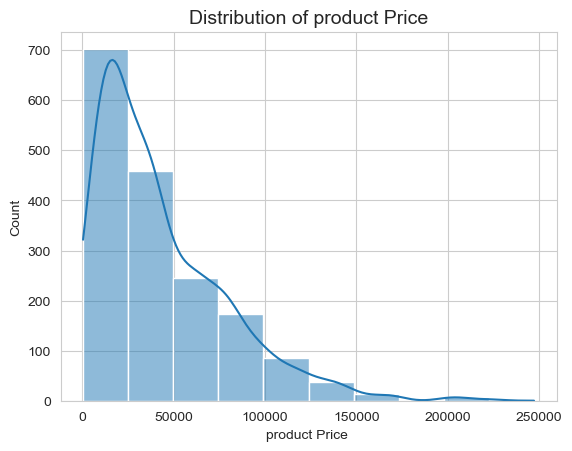

In [76]:
sns.set_style("whitegrid")
sns.histplot(new_productdf['product_price'], bins = 10 , kde = True,palette='BuPu')
plt.title('Distribution of product Price', fontsize=14)
plt.xlabel('product Price ')
plt.ylabel('Count')
plt.show()

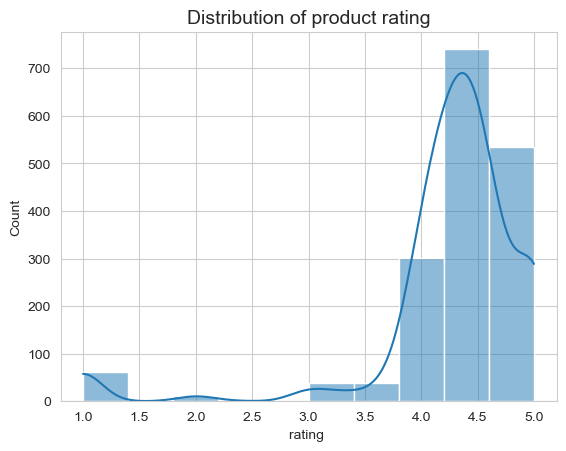

In [77]:
sns.set_style('whitegrid')
sns.histplot(new_productdf['rating'] , kde = True, bins = 10, palette='coolwarm')
plt.title('Distribution of product rating', fontsize=14)
plt.xlabel('rating ')
plt.ylabel('Count')
plt.show()

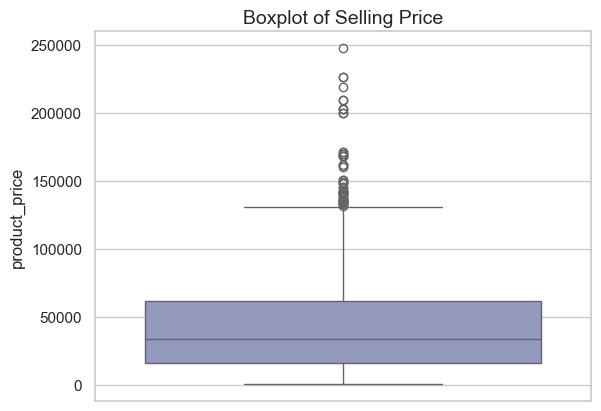

In [78]:
sns.set(style="whitegrid")
sns.boxplot(new_productdf['product_price'],palette='BuPu')
plt.title('Boxplot of Selling Price',fontsize=14)
plt.show()

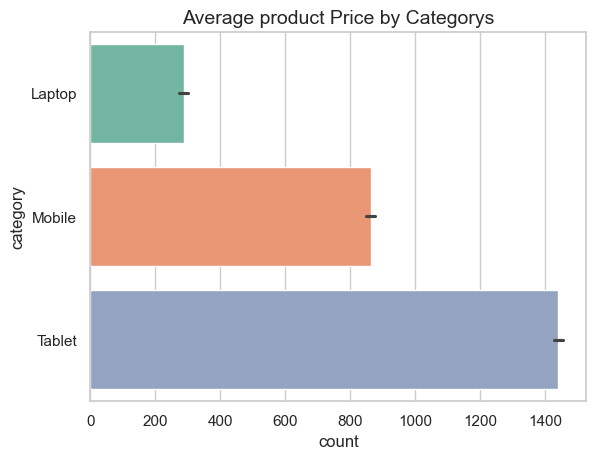

In [79]:
sns.set(style="whitegrid")
sns.barplot(data = new_productdf, x= new_productdf['category'].index ,y = new_productdf['category'],palette='Set2')
plt.title('Average product Price by Categorys',fontsize=14)
plt.xlabel("count")
plt.show()


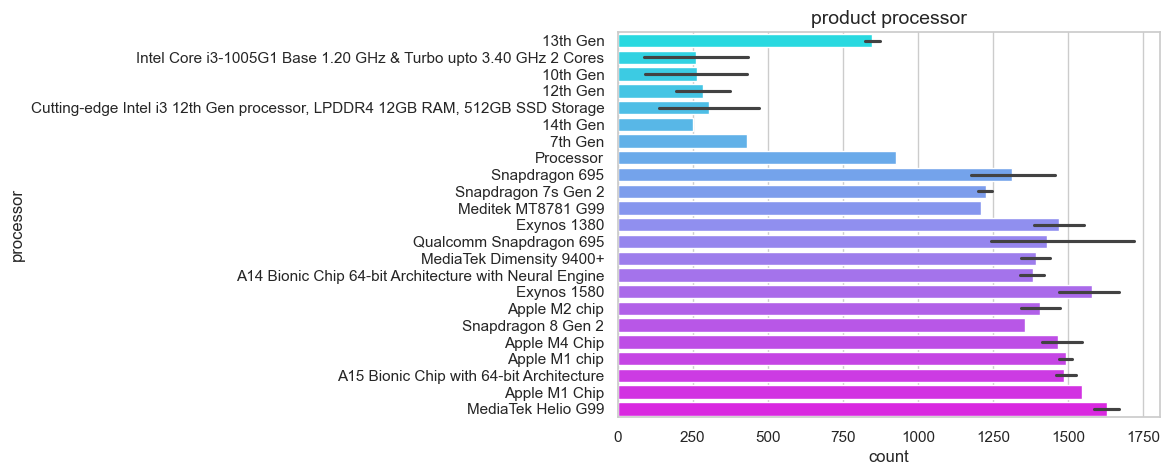

In [80]:
plt.figure(figsize=(7,5))
sns.set(style="whitegrid")
sns.barplot(data = new_productdf, x= new_productdf['processor'].index ,y = new_productdf['processor'],palette='cool')
plt.title('product processor',fontsize=14)
plt.xlabel("count")
plt.show()


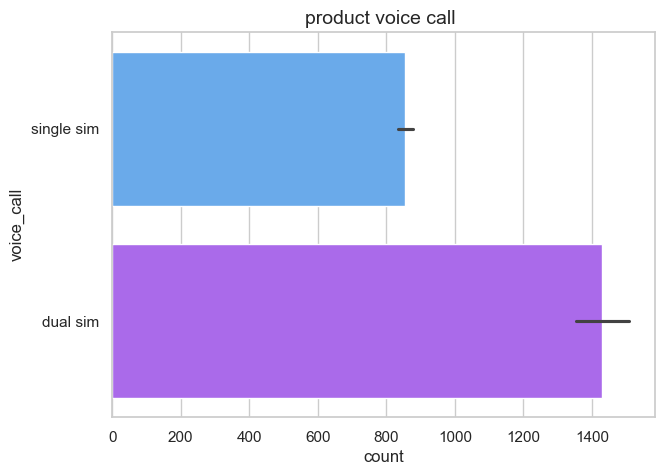

In [81]:
plt.figure(figsize=(7,5))
sns.set(style="whitegrid")
sns.barplot(data = new_productdf, x= new_productdf['voice_call'].index ,y = new_productdf['voice_call'],palette='cool')
plt.title('product voice call ',fontsize=14)
plt.xlabel("count")
plt.show()


### **Bivaraite Analysis**

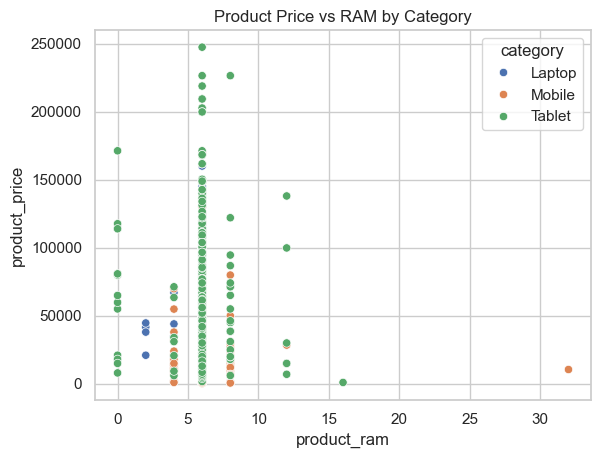

In [82]:
sns.scatterplot(x='product_ram', y='product_price', data=new_productdf, hue='category')
plt.title('Product Price vs RAM by Category')
plt.show()

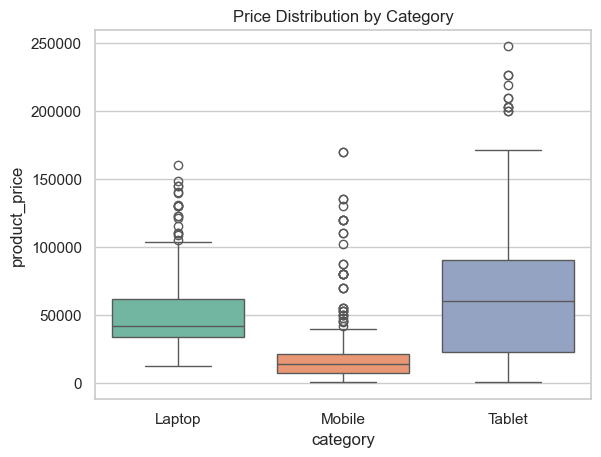

In [83]:
sns.boxplot(x='category', y='product_price', data=new_productdf, palette='Set2')
plt.title('Price Distribution by Category')
plt.show()

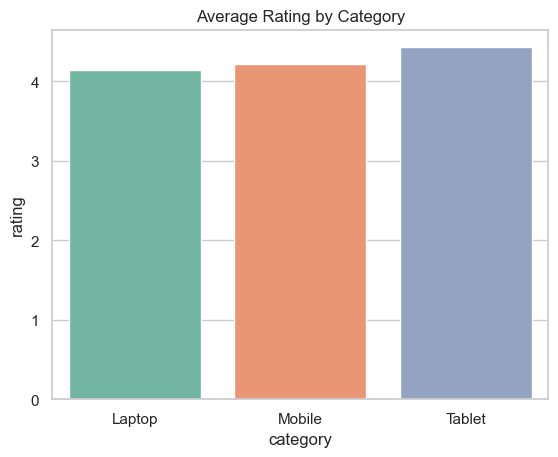

In [84]:
sns.barplot(x='category', y='rating', data=new_productdf, ci=None, palette='Set2')
plt.title('Average Rating by Category')
plt.show()


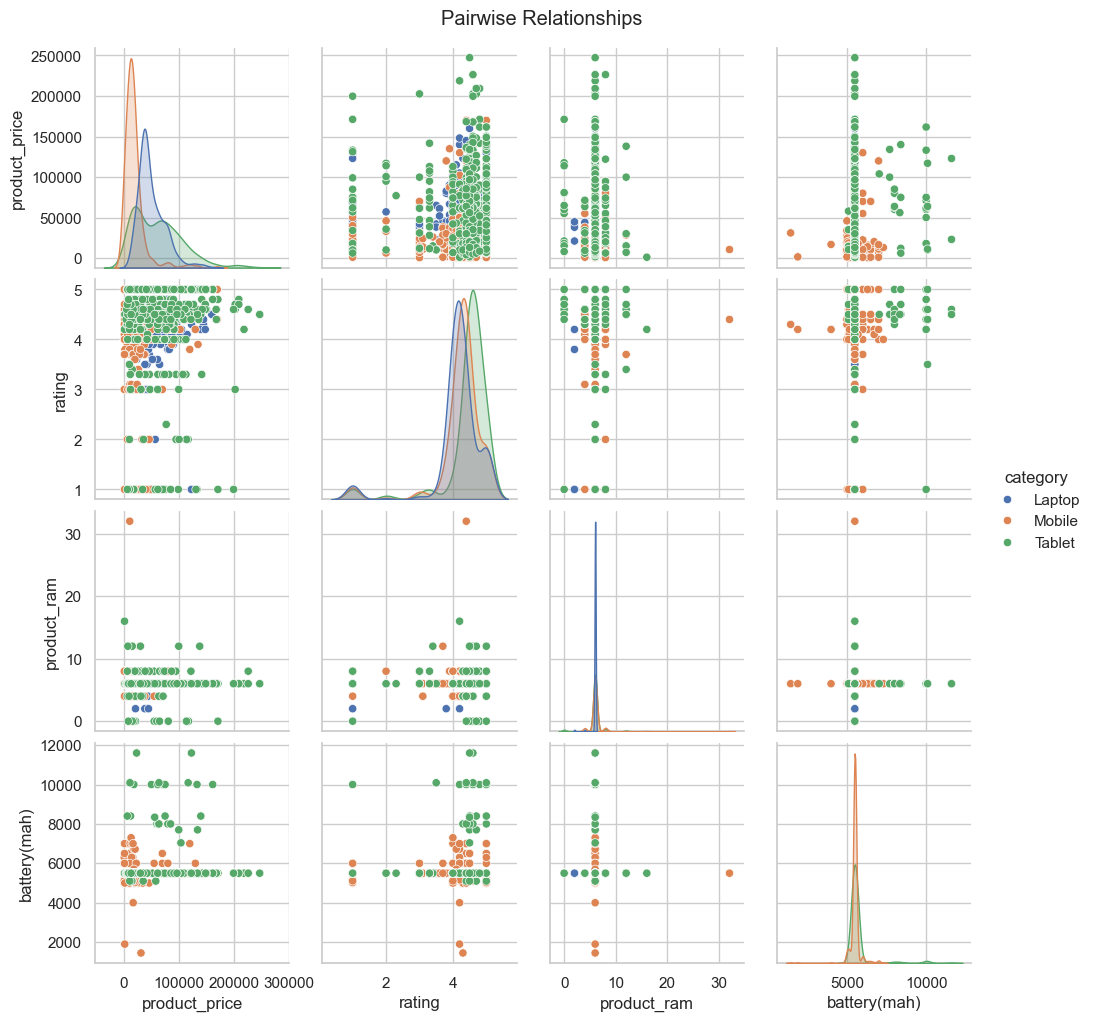

In [85]:
sns.pairplot(new_productdf[['product_price', 'rating', 'product_ram', 'battery(mah)', 'category']], hue='category')
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()

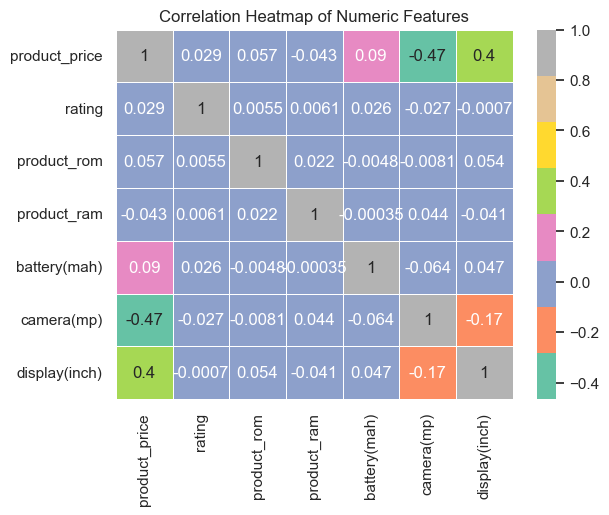

In [86]:
corr = new_productdf[['product_price','rating', 'product_rom', 'product_ram', 'battery(mah)', 'camera(mp)', 'display(inch)']].corr()
sns.heatmap(corr, annot=True, cmap='Set2', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

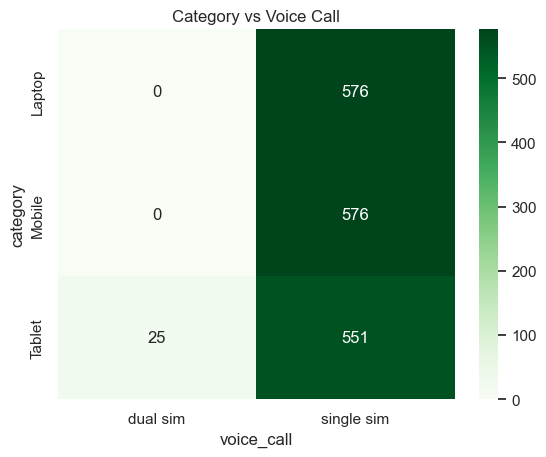

In [87]:
# Heatmap: Category vs Voice Call
cross_tab = pd.crosstab(new_productdf['category'],new_productdf['voice_call'])
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Greens')
plt.title('Category vs Voice Call')
plt.show()


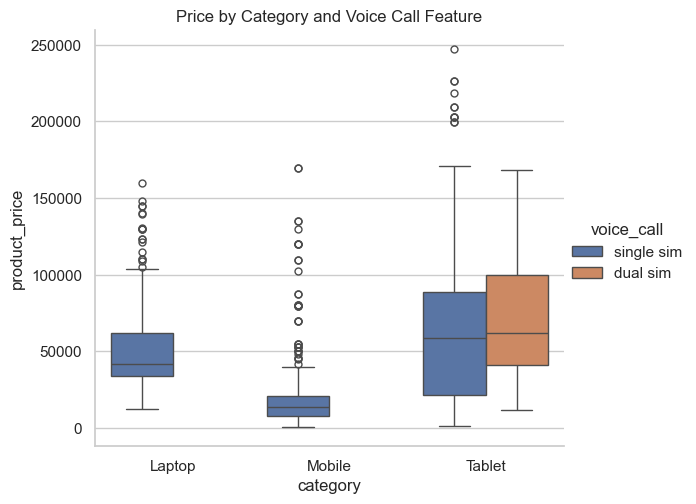

In [88]:
sns.catplot(x='category', y='product_price', hue='voice_call', kind='box', data=new_productdf, height=5, aspect=1.2)
plt.title('Price by Category and Voice Call Feature')
plt.show()
